In [1]:
# import the necessary packages
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# set the start and end dates for our market data request
end_date = datetime(year=2025, month=3, day=1)
start_date = datetime(year=2023, month=1, day=1)

In [3]:
# set the name of the ticker we want to download market data for
ticker = "NVDA"

# download market data for a single ticker
df_single = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=True
)

[*********************100%***********************]  1 of 1 completed


In [4]:
df_single.head()

Ticker           NVDA                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2023-01-03  14.838840  14.983722  14.084458  14.303279  401277000
2023-01-04  14.555074  14.840839  14.229341  14.736924  431324000
2023-01-05  14.479135  14.552076  14.136416  14.253321  389168000
2023-01-06  14.462149  14.997711  14.022510  14.846834  405044000
2023-01-09  15.271486  16.042853  15.128602  15.615204  504231000

In [5]:
df_single.columns

MultiIndex([('NVDA',   'Open'),
            ('NVDA',   'High'),
            ('NVDA',    'Low'),
            ('NVDA',  'Close'),
            ('NVDA', 'Volume')],
           names=['Ticker', 'Price'])

In [7]:
# define the list of tickers we want to fetch market data for
tickers = ["NVDA", "META", "AAPL", "UBER", "AMZN", "TSLA", "MSFT", "GOOGL", "AMD", "QCOM", "NFLX", "INTC"] 

# download market data for a multiple tickers
df_multi = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

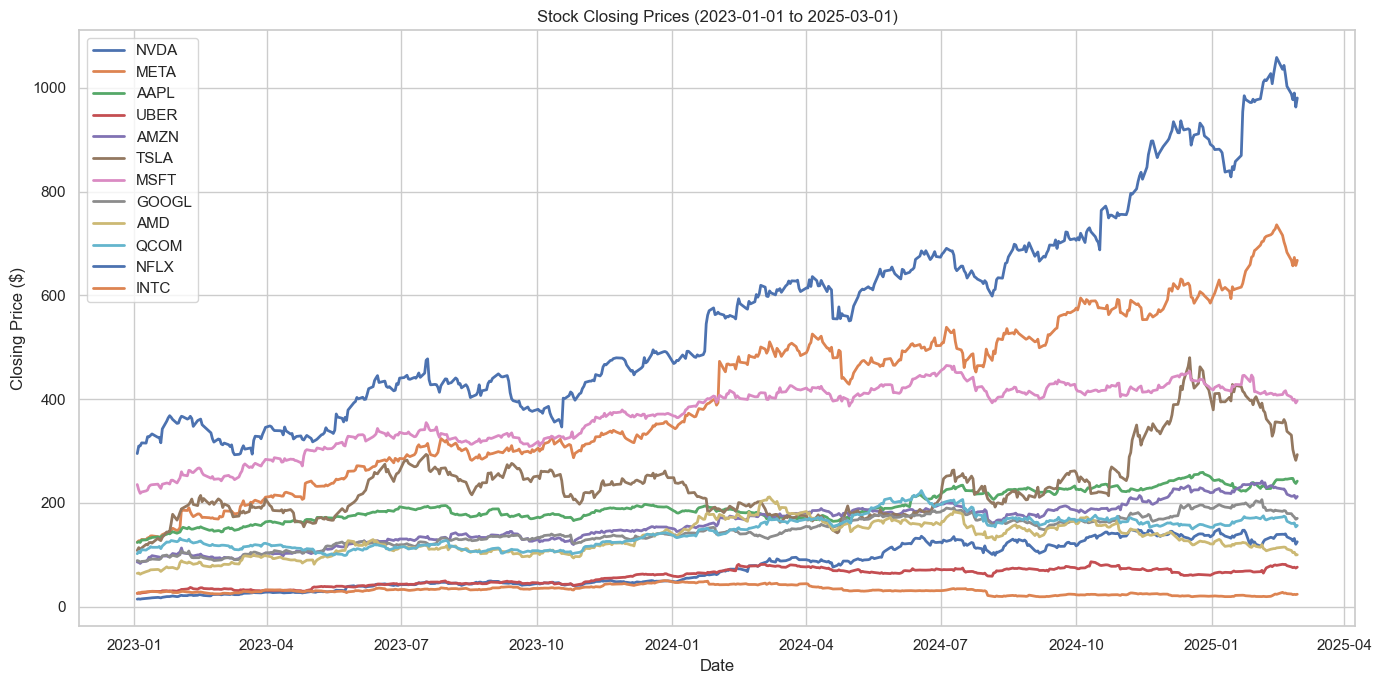

In [9]:
# initialize a new figure
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# loop over the tickers
for ticker in tickers:
    # plot the closing price for each
    sns.lineplot(
        data=df_multi[ticker]["Close"],
        label=ticker,
        linewidth=2
    )

# set the plot title
plt.title(
    f"Stock Closing Prices ("
    f"{start_date.strftime('%Y-%m-%d')} "
    f"to {end_date.strftime('%Y-%m-%d')})"
)

# set the plot labels
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")

# finish constructing the plot
plt.tight_layout()
plt.show()

# Index Analysis + 3 stocks

In [26]:
symbols = ["^NDX", "^GSPC", "UBER", "PINS", "AMZN", "META"]

df_symbols = yf.download(
    tickers=symbols,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=True
)

[*********************100%***********************]  6 of 6 completed


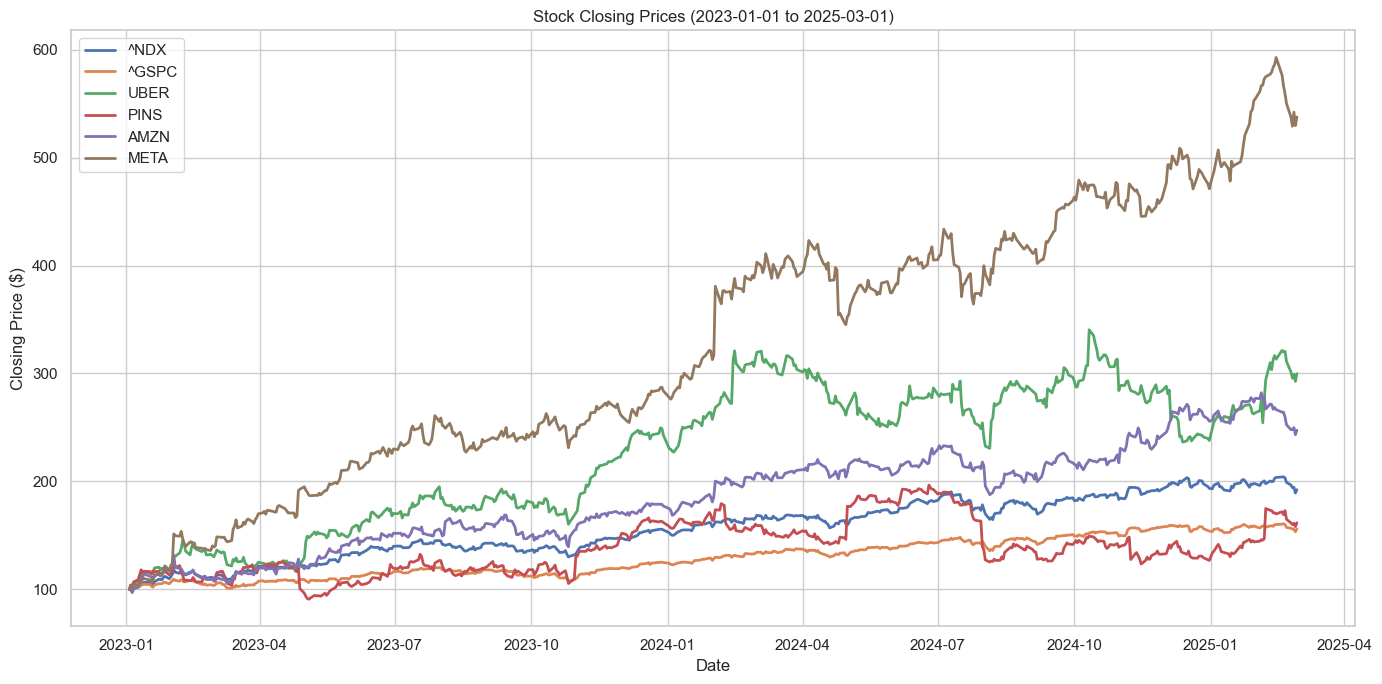

In [27]:
# initialize a new figure
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

for _ in symbols:
    # normalize the data
    close_price = df_symbols[_]["Close"]
    close_price = close_price / close_price.iloc[0] * 100

    # plot the closing price for each
    sns.lineplot(
        data=close_price,
        label=_,
        linewidth=2
    )

# set the plot title
plt.title(
    f"Stock Closing Prices ("
    f"{start_date.strftime('%Y-%m-%d')} "
    f"to {end_date.strftime('%Y-%m-%d')})"
)

# set the plot labels
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")

# finish constructing the plot
plt.tight_layout()
plt.show()